# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

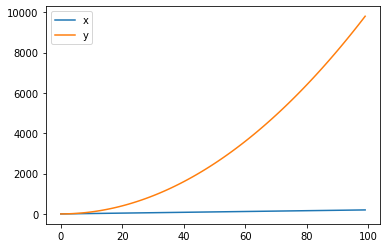

In [4]:
# Method 1
y = np.arange(0,100)
plt.plot(x, x*2, label='x')
plt.plot(y, y**2, label='y')

plt.legend()
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

Text(0.5, 1.0, 'Simple plot')

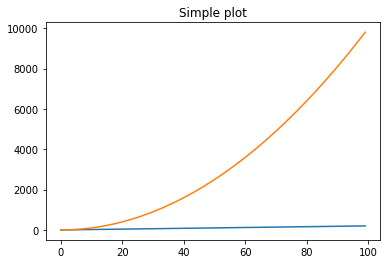

In [5]:
# Method 2
x = np.arange(0,100)
y = x*2
z = x**2

#Streams=x.plot(x="x", y=["y", "z"])
fig, ax = plt.subplots()
ax.plot(x,y, z)
ax.set_title('Simple plot')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

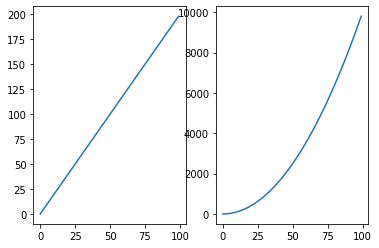

In [6]:
# your code here
f, (x1, x2) = plt.subplots(1, 2)
x1.plot(x, y)
x2.plot(x, z)


#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

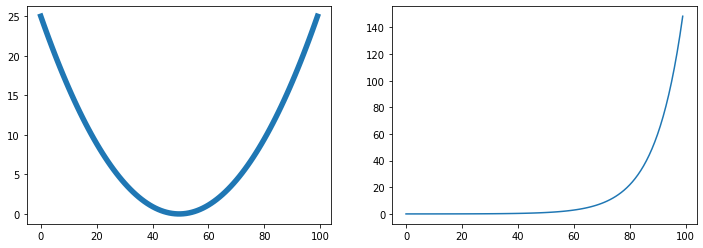

In [7]:
# your code here

f,(x1, x2) = plt.subplots(1, 2, figsize=(12, 4))

x = np.linspace(-5,5,100)
y1 = x**2
y2 = np.exp(x)
x1.plot(y1, linewidth = 5.5)
x2.plot(y2)

plt.show()

In [8]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here
fitbit= pd.read_csv('fitbit2.csv')
print(fitbit.columns)
fitbit

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
5,2015-05-13,276,779,5.79,15,726.000,172,34,18,1094,...,3.597738,Wednesday,2.0,1,6.750000,88.621444,6.783333,82.892057,May,5
6,2015-05-14,2687,5614,4.17,2,782.000,216,13,1,9830,...,2.591117,Thursday,3.0,1,6.350000,91.807229,6.750000,88.621444,May,5
7,2015-05-15,2793,8169,6.07,14,801.000,218,8,7,1092,...,3.771722,Friday,4.0,1,4.483333,87.908497,6.350000,91.807229,May,5
8,2015-05-16,4061,19971,14.84,18,532.000,247,101,118,27,...,9.221146,Saturday,5.0,0,7.533333,89.151874,4.483333,87.908497,May,5
9,2015-05-17,3349,852,6.33,12,606.000,186,46,73,1766,...,3.933278,Sunday,6.0,0,4.483333,92.439863,7.533333,89.151874,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

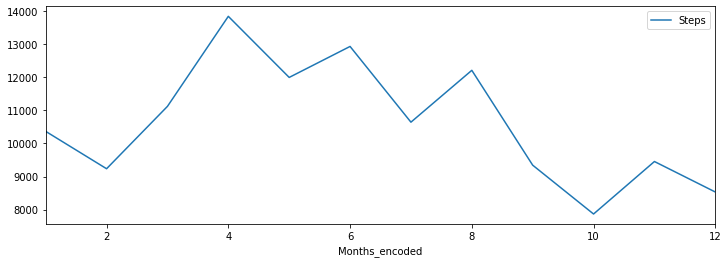

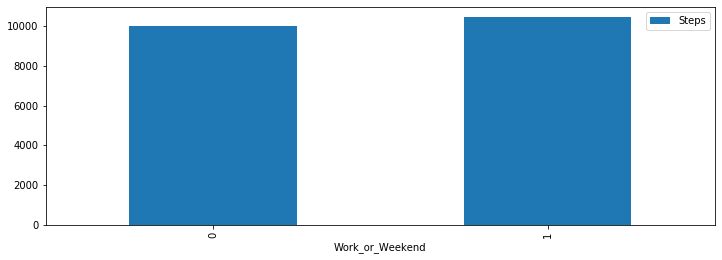

In [10]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
steps_month = fitbit.groupby(by = ['Months_encoded']).agg({'Steps':np.median})
steps_month
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
steps_week = fitbit.groupby(by = ['Work_or_Weekend']).agg({'Steps':np.median})

month_plot = steps_month.plot(figsize=(12,4))

steps_week_plot = steps_week.plot.bar(xticks = steps_week.index, figsize=(12,4))


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

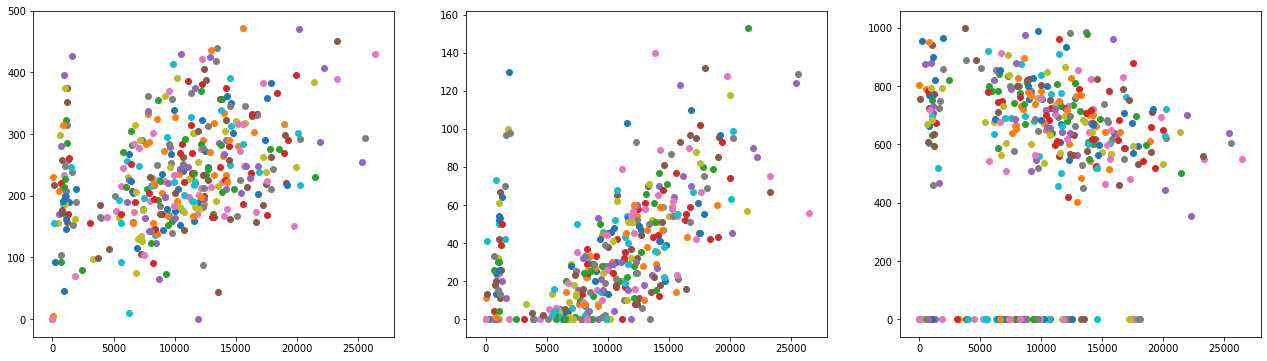

In [11]:
# your code here
mla = fitbit['Minutes Lightly Active']
stp = fitbit['Steps']
mva = fitbit['Minutes Very Active']
sed = fitbit['Minutes Sedentary']
f, (x1, x2, x3) = plt.subplots(1, 3, figsize=(22,6))

for i in range(len(stp)):
    x1.scatter(stp[i], mla[i])
    x2.scatter(stp[i], mva[i])
    x3.scatter(stp[i], sed[i])

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [12]:
# your code here
titanic = pd.read_csv('titanic.csv')


#### Explore the titanic dataset using Pandas dtypes.

In [13]:
# your code here

df = pd.DataFrame(titanic)
df.dtypes
df
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [14]:
# NUMERICAL VARIABLES
# your code here
numvar = df.select_dtypes(exclude='object')
numvar.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [15]:
# CATEGORICAL VARIABLES
# your code here
catvar=df.select_dtypes(include='object')
catvar.dtypes

Name        object
Gender      object
Ticket      object
Cabin       object
Embarked    object
dtype: object

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

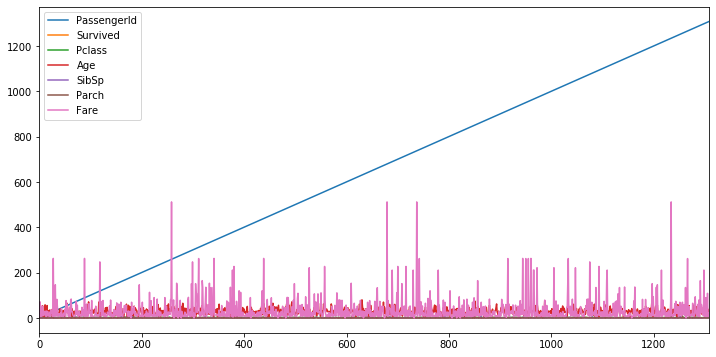

In [16]:
# your code here
numvar.plot(figsize=(12,6))
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

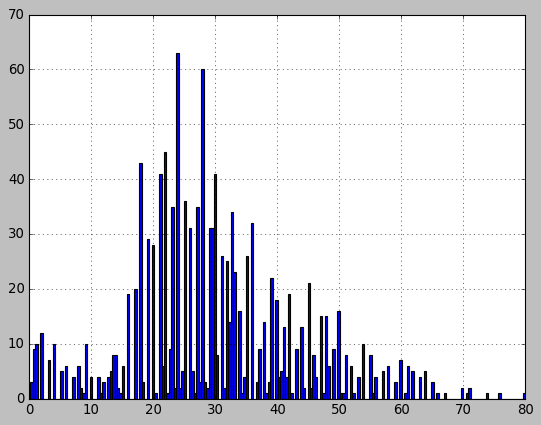

In [17]:
titanic["Age"].hist(bins=200)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1164d58d0>],
      dtype=object)

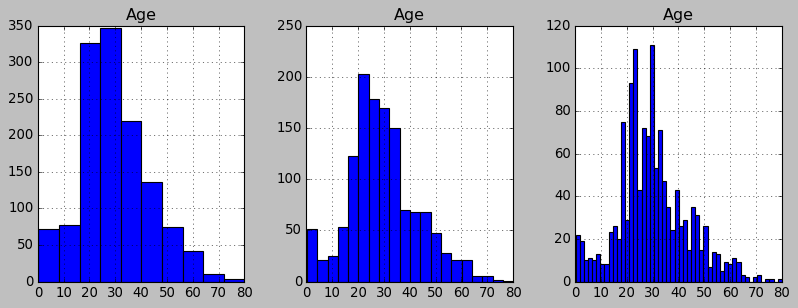

In [18]:
# your code here
f, ax = plt.subplots(1,3, figsize=(12,4))
df.hist(column='Age', ax=ax[0], bins=10)
df.hist(column='Age', ax=ax[1], bins=20)
df.hist(column='Age', ax=ax[2], bins=50)

#### How does the bin size affect your plot?

In [19]:
"""
the size of the axis 1, the axis 0 don't change
"""

"\nthe size of the axis 1, the axis 0 don't change\n"

#### Use seaborn to show the distribution of column `Age`.

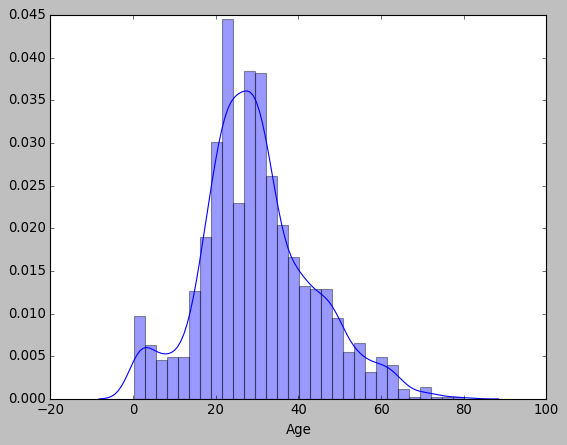

In [20]:
# your code here
import seaborn as sns
#sns.lineplot(data = df['Age'][:90])
sns.distplot(titanic["Age"])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

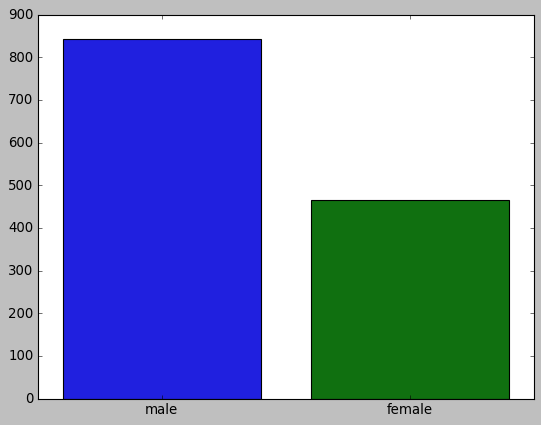

In [21]:
# Method 1 - matplotlib
# your code here

ge=df['Gender'].value_counts()
#sns.barplot(x=ge.index, y=clas.ge)
#df['Gender'].hist(figsize=(2,3))
gg=pd.DataFrame(ge)
gt=gg.T
sns.barplot(data = gt)

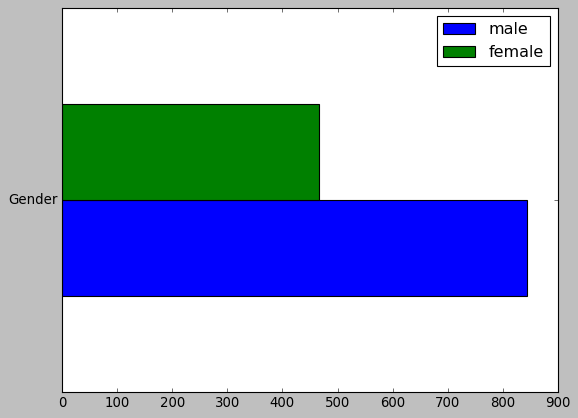

In [22]:
# Method 2 - seaborn
# your code here
gt.plot.barh()

#### Use the right plot to visualize the column `Pclass`.

3    709
1    323
2    277
Name: Pclass, dtype: int64

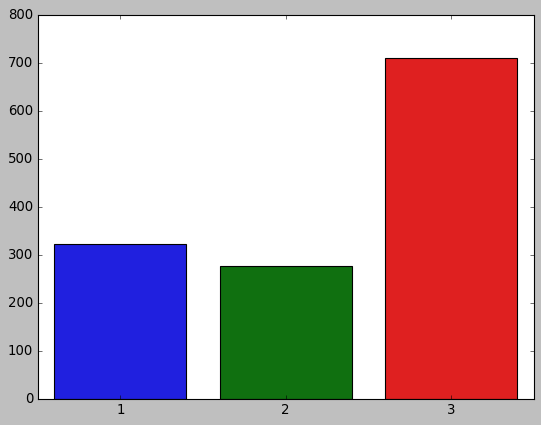

In [23]:
# your code here
clas = titanic["Pclass"].value_counts()
sns.barplot(x=clas.index, y=clas.values)
clas

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

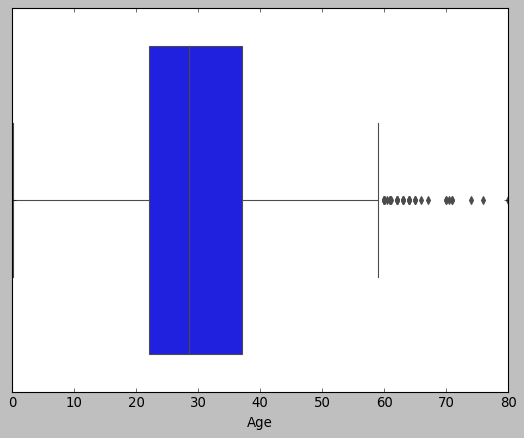

In [24]:
# your code here
sns.boxplot(titanic["Age"])

In [25]:
"""
your comments here
the man is less than 30, the min is O, max almost 60, Q1 more than 20 and Q3 less than 40
"""

'\nyour comments here\nthe man is less than 30, the min is O, max almost 60, Q1 more than 20 and Q3 less than 40\n'

#### What does the last plot tell you about the feature `Age`?

In [26]:
"""
give statistics of the age
"""

'\ngive statistics of the age\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

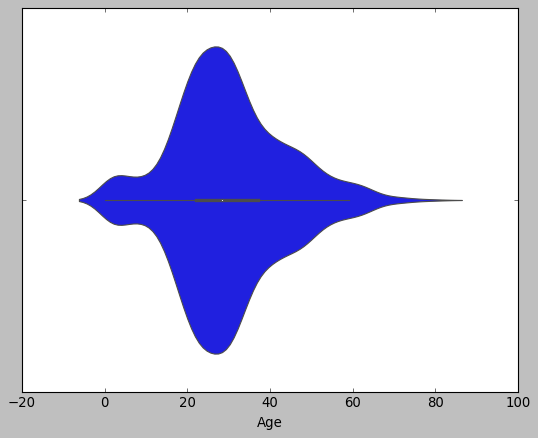

In [27]:
# your code here
sns.violinplot("Age", data = titanic)

#### What additional information does the last plot provide about feature `Age`?

In [28]:
"""
your comments here

the distribution of the age
"""

'\nyour comments here\n\nthe distribution of the age\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

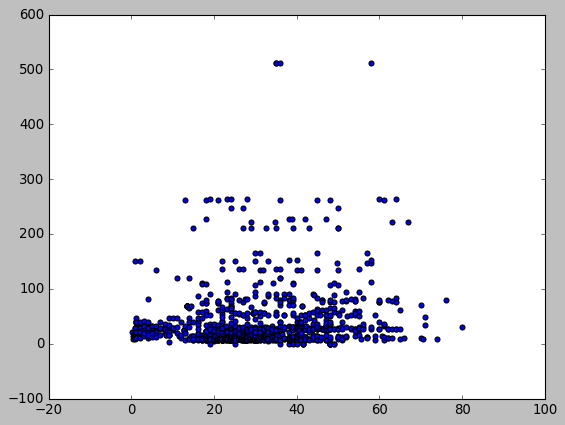

In [29]:
# Method 1 - matplotlib
# your code here
sorted_age = titanic.sort_values(by=["Age"])
plt.scatter(sorted_age["Age"], sorted_age["Fare"])
plt.show()

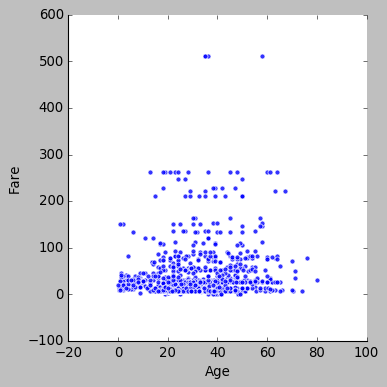

In [36]:
# Method 2 - seaborn
# your code here
sns.relplot(x="Age", y="Fare", alpha=.8, data=titanic)

#### Plot the correlation matrix using seaborn.

/Users/Estelle/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Estelle/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


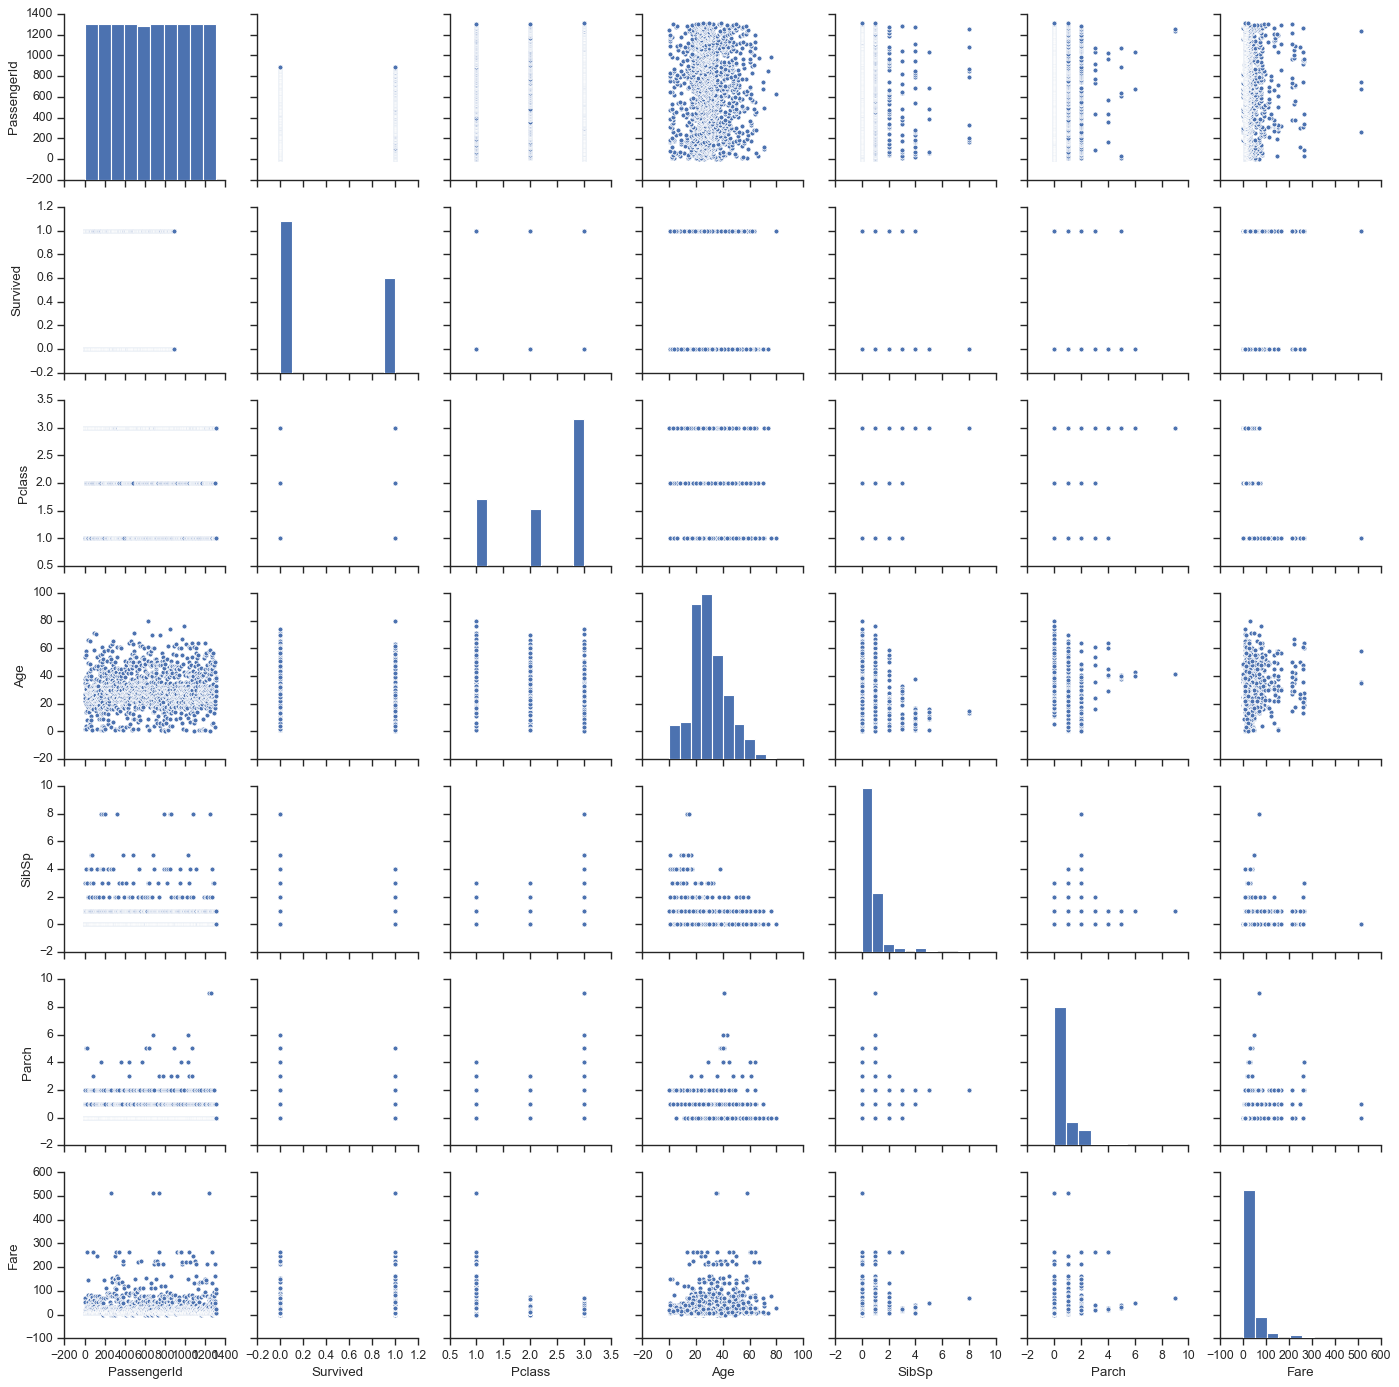

In [37]:
# your code here
sns.set(style="ticks")
sns.pairplot(titanic)

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

[Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')]

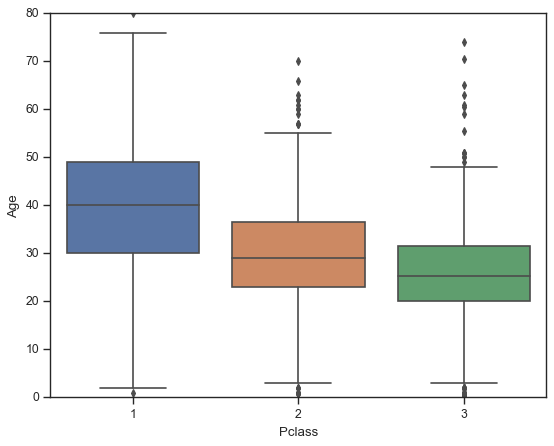

In [42]:
# your code here
ax = sns.boxplot(x="Pclass", y="Age", data=titanic)
ax.set_xticklabels(ax.get_xticklabels())

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

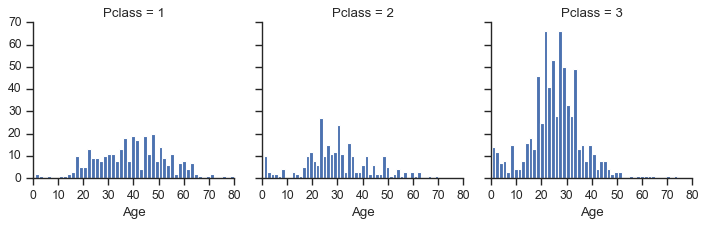

In [45]:
# your code here
x=sns.FacetGrid(titanic, col="Pclass")
x.map(plt.hist, "Age", bins=50)